In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

# Question 1

In [2]:
print(X.shape)

(569, 30)


Il y a 569 exemples et 30 variables explicatives.

# Question 2

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Question 3

In [4]:
from sklearn.linear_model import Perceptron
print(Perceptron().fit(X_train,y_train).score(X_test,y_test))

0.8741258741258742


# Question 4

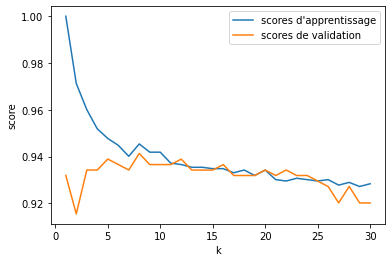

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve

k_range = range(1,31)
train_scores, valid_scores = validation_curve(KNeighborsClassifier(), X_train, y_train, "n_neighbors", k_range, cv=5)
train_scores_mean = np.mean(train_scores,axis=1)
valid_scores_mean = np.mean(valid_scores,axis=1)

import matplotlib.pyplot as plt
plt.plot(k_range,train_scores_mean,label="scores d'apprentissage")
plt.plot(k_range,valid_scores_mean,label="scores de validation")
plt.legend()
plt.xlabel('k')
plt.ylabel('score')
plt.show()

Pour les grandes valeurs de k considérées ci-dessus, les scores décroissent: il y a donc sous-apprentissage dans cette zone. Il n'y a donc pas besoin de considérer des valeurs de k plus grandes, car l'algorithme kNN aurait alors un plus grand biais qui ne ferait qu'accentuer le sous-apprentissage.

In [6]:
k_best = k_range[np.argmax(valid_scores_mean)]

KNeighborsClassifier(n_neighbors=k_best).fit(X_train,y_train).score(X_test,y_test)

0.9230769230769231

# Question 5

In [7]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=.1,penalty='l1',solver='liblinear')
logreg.fit(X_train,y_train)
print(logreg.score(X_test,y_test))

0.9090909090909091


In [8]:
C_range = np.logspace(-2, 10, 20)

On a créé ci-dessus un array contenant 20 valeurs entre e^(-2) et e^(10) réparties de façon équidistantes sur l'échelle logarithmique (les valeurs croissent donc de façon exponentielle).

# Question 6

/usr/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, i

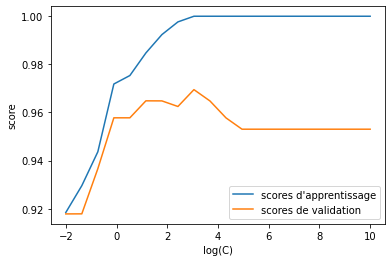

In [9]:
train_scores, valid_scores = validation_curve(LogisticRegression(penalty='l1',solver='liblinear'), X_train, y_train, "C", C_range, cv=5)
train_scores_mean = np.mean(train_scores,axis=1)
valid_scores_mean = np.mean(valid_scores,axis=1)

plt.plot(np.log10(C_range),train_scores_mean,label="scores d'apprentissage")
plt.plot(np.log10(C_range),valid_scores_mean,label="scores de validation")
plt.legend()
plt.xlabel('log(C)')
plt.ylabel('score')
plt.show()

Pour les petites valeurs de C considérés, les deux courbes croissent: il s'agit d'une zone de sous-apprentissage. Pour les grandes valeurs de C considérés, les courbes se séparent, et le score de validation décroît (légèrement) tandis que le score d'apprentissage est très élevé: il s'agit d'une zone de sur-apprentissage. Il n'y a donc pas besoin de considérer d'autres intervalles de valeur.

In [10]:
C_best = C_range[np.argmax(valid_scores_mean)]

logreg = LogisticRegression(penalty='l1',solver='liblinear',C=C_best).fit(X_train,y_train)
print(logreg.score(X_test,y_test))

0.9300699300699301
